# **Visión por Computadora I**

### **Carrera de Especialización en Inteligencia Artificial, Facultad de Ingeniería**

### **Universidad de Buenos Aires, Mayo de 2024**


### Trabajo Práctico I: Edgar David Guarin Castro (davidg@marketpsychdata.com)

## Contenido
* [0. Importando paquetes](#0.-Importando-paquetes)
* [1. Coordenadas Cromaticas y White Patch](#1.-Coordenadas-Cromaticas-y-White-Patch)
    - [1.1 Coordenadas Cromaticas](#1.1-Coordenadas-Cromaticas)
    - [1.2 Algoritmo White Patch](#1.2-Algoritmo-White-Patch)
* [2. Histogramas](#2.-Histogramas)
    - [2.1 Comparacion de histogramas](#2.1-Comparacion-de-histogramas)
    - [2.2 Segmentacion](#2.2-Segmentacion)
    
________________________________

## 0. Importando paquetes

In [1]:
%matplotlib inline
import numpy as np 
import cv2 as cv
import matplotlib.pyplot as plt

## 1. Coordenadas Cromaticas y White Patch

### 1.1 Coordenadas Cromaticas

Inicialmente se define la función para el cálculo de las coordenadas cromáticas:

In [2]:
def chrom_coord(image:np.ndarray) -> np.ndarray:
    """
    Algoritmo de Coordenadas Cromáticas

    Parámetros
    ----------
    image:np.ndarray 
        Imagen RGB
    
    Respuesta
    ------
    im_cc:np.ndarray
        Imagen transformadas en coordenadas cromáticas
    """
    # Descomponiendo la imagen en los canales RGB
    im_r, im_g, im_b = cv.split(image)

    # Convirtiendo los canales a tipo flotante para evitar división entera
    im_r = im_r.astype(np.float32)
    im_g = im_g.astype(np.float32)
    im_b = im_b.astype(np.float32)

    # Calculando la suma de los canales RGB
    sum_rgb = im_r + im_g + im_b

    # Calculando las coordenadas cromáticas
    ccr = im_r / sum_rgb
    ccg = im_g / sum_rgb
    ccb = im_b / sum_rgb

    # Manejo de divisiones por cero
    ccr[sum_rgb == 0] = 0
    ccg[sum_rgb == 0] = 0
    ccb[sum_rgb == 0] = 0

    # Creando una matriz de ceros del mismo tamaño que la imagen original
    im_cc = np.zeros_like(image, dtype=np.uint8)  # Se convierte a uint8 para visualización

    # Creando la imagen resultante en coordenadas cromaticas
    im_cc[:, :, 0] = ccr * 255 # Escalando los canales cromáticos al rango 0-255
    im_cc[:, :, 1] = ccg * 255
    im_cc[:, :, 2] = ccb * 255

    return im_cc

Se cargan las imágenes originales a ser tratadas.

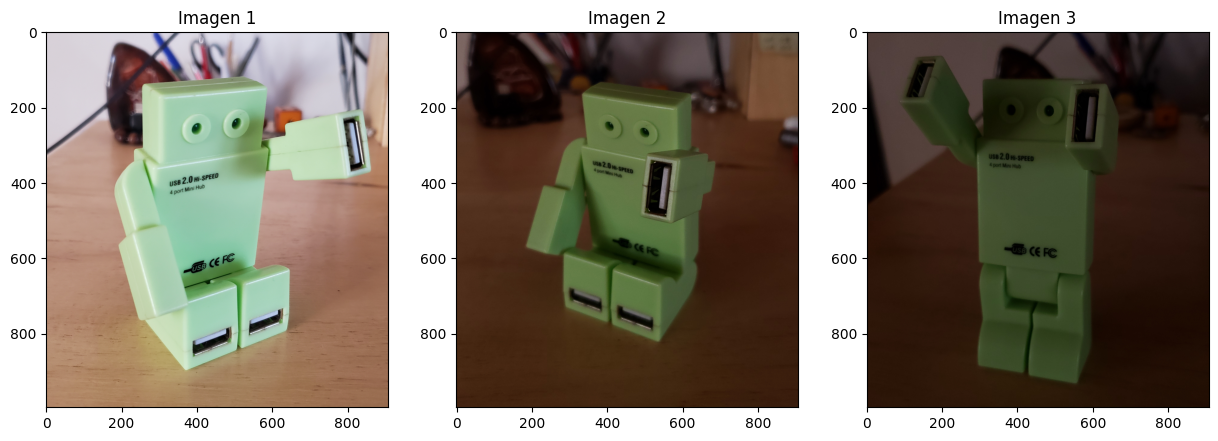

In [3]:
IMG_PATH = "coord_cromaticas"
# Cargando las imagenes
img1 = cv.imread(f'{IMG_PATH}/CoordCrom_1.png')
img2 = cv.imread(f'{IMG_PATH}/CoordCrom_2.png')
img3 = cv.imread(f'{IMG_PATH}/CoordCrom_3.png')

# Pasando la imagen de BRG a RGB
imgRGB1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
imgRGB2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
imgRGB3 = cv.cvtColor(img3, cv.COLOR_BGR2RGB)

# Configurando la visualización de las tres imagenes
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Ajustando el espacio entre las imágenes
plt.subplots_adjust(hspace=0.2, wspace=0.2)

# Mostrando las imágenes
axs[0].imshow(imgRGB1)
axs[0].set_title('Imagen 1')

axs[1].imshow(imgRGB2)
axs[1].set_title('Imagen 2')

axs[2].imshow(imgRGB3)
axs[2].set_title('Imagen 3')

plt.show()

Como se observa en las imágenes anteriores, la luminosidad o brillo es máximo en la imagen 1 y mínimo en la imagen 3. Esto dificulta la percepción de ciertos detalles y colores en las imagenes 2 y 3.
Para evitar estos problemas, se aplica el cálculo de coordenas cromáticas a cada imagen:

/var/folders/sz/sjmjp0xj2r35nk_bcvzdc0wc0000gn/T/ipykernel_15697/2778515629.py:27: RuntimeWarning: invalid value encountered in divide
  ccr = im_r / sum_rgb
/var/folders/sz/sjmjp0xj2r35nk_bcvzdc0wc0000gn/T/ipykernel_15697/2778515629.py:28: RuntimeWarning: invalid value encountered in divide
  ccg = im_g / sum_rgb
/var/folders/sz/sjmjp0xj2r35nk_bcvzdc0wc0000gn/T/ipykernel_15697/2778515629.py:29: RuntimeWarning: invalid value encountered in divide
  ccb = im_b / sum_rgb


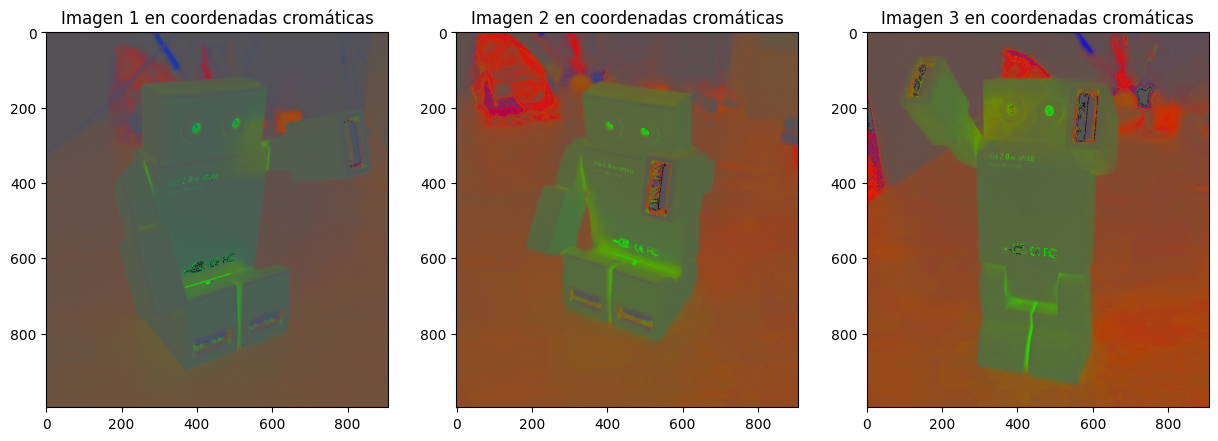

In [4]:
# Calculando las coordenadas cromáticas de cada imagen
im_cc1 = chrom_coord(imgRGB1)
im_cc2 = chrom_coord(imgRGB2)
im_cc3 = chrom_coord(imgRGB3)

# Configurando la visualización de las tres imagenes
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Ajustando el espacio entre las imágenes
plt.subplots_adjust(hspace=0.2, wspace=0.2)

# Mostrando las imágenes resultantes
axs[0].imshow(im_cc1)
axs[0].set_title('Imagen 1 en coordenadas cromáticas')

axs[1].imshow(im_cc2)
axs[1].set_title('Imagen 2 en coordenadas cromáticas')

axs[2].imshow(im_cc3)
axs[2].set_title('Imagen 3 en coordenadas cromáticas')

plt.show()

Las imágenes resultantes despues de aplicar el cálculo de coordenadas cromáticas no dependen más del contraste, por lo que es posible percibir los detalles y formas de las imagenes incluso en condiciones de baja luminosidad como en el caso de la imagen 3.

### 1.2 Algoritmo White Patch

Se define la función para la implementación del algoritmo de White Patch

In [5]:
def white_patch(image:np.ndarray) -> np.ndarray:
    """
    Algoritmo de White Patch

    Parámetros
    ----------
    image:np.ndarray 
        Imagen RGB
    
    Respuesta
    ------
    im_wp:np.ndarray
        Imagen con blancos balanceados
    """
    # Convirtiendo la imagen a tipo flotante para evitar problemas de precisión
    float_img = image.astype(np.float32)

    # Descomponiendo la imagen en los canales RGB
    im_r, im_g, im_b = cv.split(float_img)

    # Encontrando los valores máximos en cada canal
    r_max = np.max(im_r)
    g_max = np.max(im_g)
    b_max = np.max(im_b)

     # Creando una matriz de ceros del mismo tamaño que la imagen original
    im_wp = np.zeros_like(float_img, dtype=np.uint8)  # Se convierte a uint8 para visualización

    # Escalar cada canal por su valor máximo respectivo para balancear el blanco
    im_wp[:, :, 0] = (im_r / r_max) * 255
    im_wp[:, :, 1] = (im_g / g_max) * 255
    im_wp[:, :, 2] = (im_b / b_max) * 255

    # Imprimiendo los valores máximos de RGB para test
    print(f"{r_max}, {g_max}, {b_max} \n")

    # Convertir de vuelta a uint8
    return im_wp

Se cargan las imágenes a ser tratadas con el algoritmo White Patch. Estas imágenes presentan diferentes tipos de iluminación del mismo objeto, lo que dificulta la identificación de sus detalles:

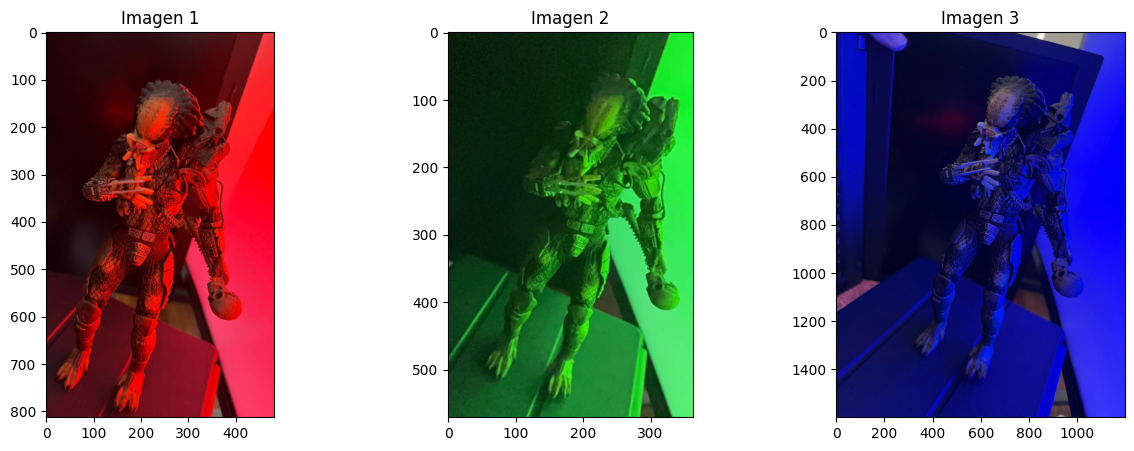

In [6]:
IMG_PATH = "white_patch"

# Cargando las imagenes
img1 = cv.imread(f'{IMG_PATH}/wp_red.png')
img2 = cv.imread(f'{IMG_PATH}/wp_green.png')
img3 = cv.imread(f'{IMG_PATH}/wp_blue.jpg')

# Pasando la imagen de BRG a RGB
imgRGB1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
imgRGB2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
imgRGB3 = cv.cvtColor(img3, cv.COLOR_BGR2RGB)

# Configurando la visualización de las tres imagenes
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Ajustando el espacio entre las imágenes
plt.subplots_adjust(hspace=0.2, wspace=0.2)

# Mostrando las imágenes
axs[0].imshow(imgRGB1)
axs[0].set_title('Imagen 1')

axs[1].imshow(imgRGB2)
axs[1].set_title('Imagen 2')

axs[2].imshow(imgRGB3)
axs[2].set_title('Imagen 3')

plt.show()

Finalmente, las imágenes son tratadas con el algoritmo White Patch y presentadas junto con los valores de RGB máximos de cada una, para verificar los cambios:

RGB máximos de la imagen 1:
255.0, 134.0, 122.0 

RGB máximos de la imagen 2:
126.0, 252.0, 155.0 

RGB máximos de la imagen 3:
255.0, 255.0, 255.0 



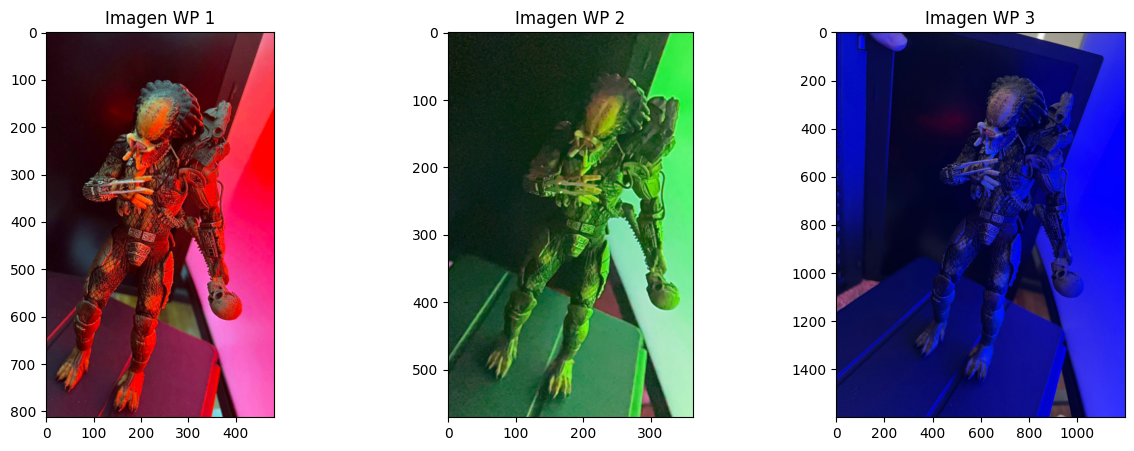

In [7]:
# Aplicando el algoritmo White-Patch a cada imagen
print("RGB máximos de la imagen 1:")
im_wp1 = white_patch(imgRGB1)
print("RGB máximos de la imagen 2:")
im_wp2 = white_patch(imgRGB2)
print("RGB máximos de la imagen 3:")
im_wp3 = white_patch(imgRGB3)

# Configurando la visualización de las tres imagenes
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Ajustando el espacio entre las imágenes
plt.subplots_adjust(hspace=0.2, wspace=0.2)

# Mostrando las imágenes resultantes
axs[0].imshow(im_wp1)
axs[0].set_title('Imagen WP 1')

axs[1].imshow(im_wp2)
axs[1].set_title('Imagen WP 2')

axs[2].imshow(im_wp3)
axs[2].set_title('Imagen WP 3')

plt.show()

Se observa que el algoritmo permite obtener con más claridad las zonas más brillantes (blancas) de las imágenes 1 y 2, en comparación con las imágenes originales. Sin embargo, en la imagen 3, el algoritmo no genera ningún efecto pues los valores máximos de RGB en dicha imágen corresponden al máximo de intensidad posible (255). Lo anterior hace que el factor de escala de los canales en el algoritmo sea 1 y la imagen se mantenga inalterada.

__________________


## 2. Histogramas

### 2.1 Comparacion de histogramas
Se cargan dos imágenes distintas del mismo tamaño:
- La imagen 1 muestra un degradé de colores.
- La imagen 2 presenta una flor.

La paleta de colores en las dos imágenes es la misma y se observa además la presencia de una franja amarilla en la parte inferior de la imagen 1, así como un borde aparentemente del mismo color en la imagen 2.

Tamaño imagen 1: (288, 287) pix
Tamaño imagen 2: (288, 287) pix


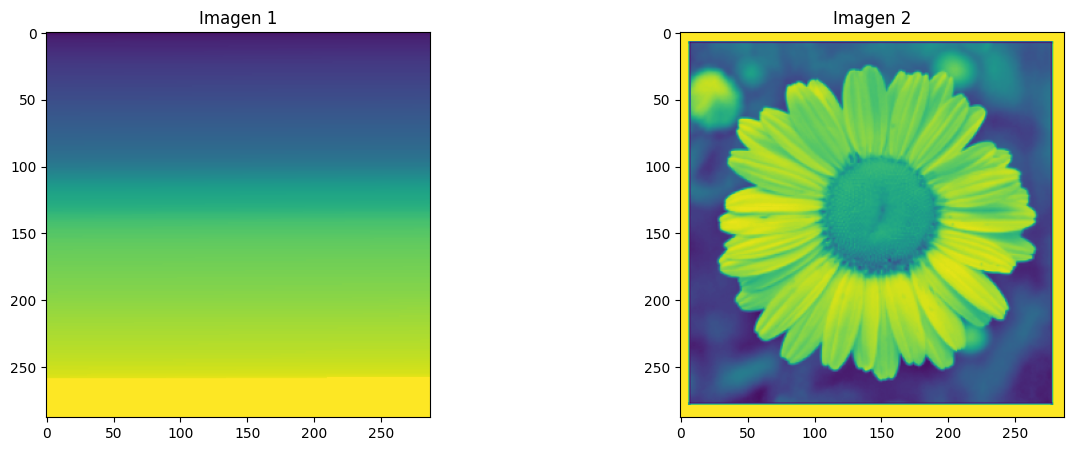

In [8]:
# Cargando las imágenes en modo monocromático (un canal)
img1 = cv.imread('img1_tp.png', cv.IMREAD_GRAYSCALE)
img2 = cv.imread('img2_tp.png', cv.IMREAD_GRAYSCALE)

# Dimensión de las imágenes
print(f'Tamaño imagen 1: {img1.shape} pix')
print(f'Tamaño imagen 2: {img2.shape} pix')

# Configurando la visualización de las imágenes
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Ajustando el espacio entre las imágenes
plt.subplots_adjust(hspace=0.2, wspace=0.2)

# Mostrando las imágenes
axs[0].imshow(img1)
axs[0].set_title('Imagen 1')

axs[1].imshow(img2)
axs[1].set_title('Imagen 2')

plt.show()

A continuación se presentan los histogramas de cada imagen, donde se grafica el número de píxeles ($N$) en función de sus intensidades ($I$). Se aprecia que en ambas imágenes:
- no hubo post-procesamiento, pues los histogramas son continuos.
- no hay píxeles oscuros, es decir, con intensidad cero.
- una gran cantidad de píxeles se distribuyen en las zonas de sombras ($25<I<100$) debido a la presencia de colores azul oscuro y de alta luminosidad ($175<I<250$) debido a los colores amarillo brillante.
- los píxeles con tonos medios ($100<I<175$, colores verdes) son menos frecuentes.
- se destaca la presencia de una gran cantidad píxeles ($N>8000$) de alta intensidad ($I=255$), debido a las franjas amarillas en cada imagen.
- los histogramas son idénticos, a pesar de que son imagenes diferentes. Esto se debe a que los tamaños de las imágenes son iguales y la paleta de colores es la misma. La semejanza de los histogramas se comprueba visualmente en la tercera figura, donde se han sobrepuesto para comparación directa. La línea roja continua representa el histograma de la imagen 1, mientras que la línea azul a trazos representa el histograma de la imagen 2.

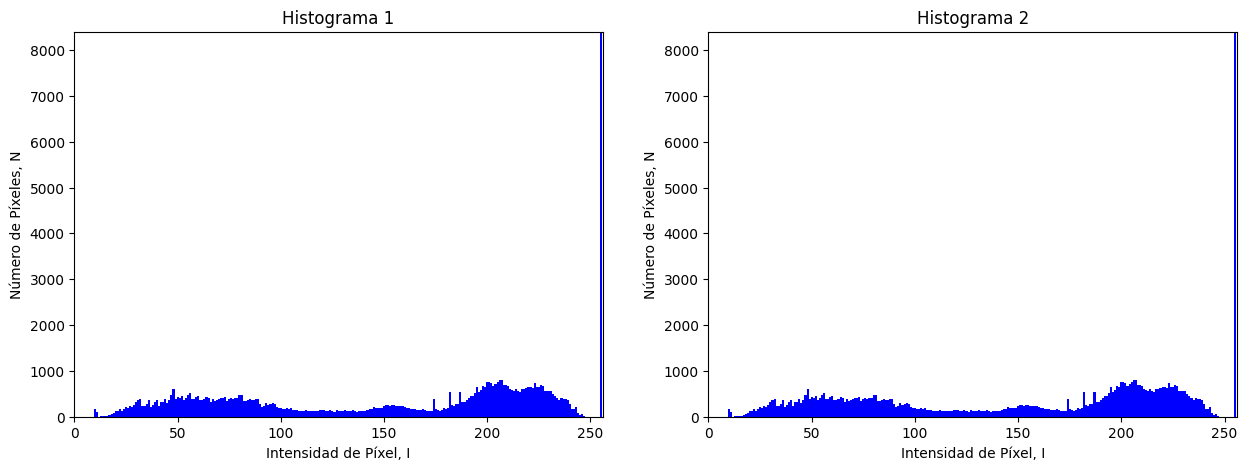

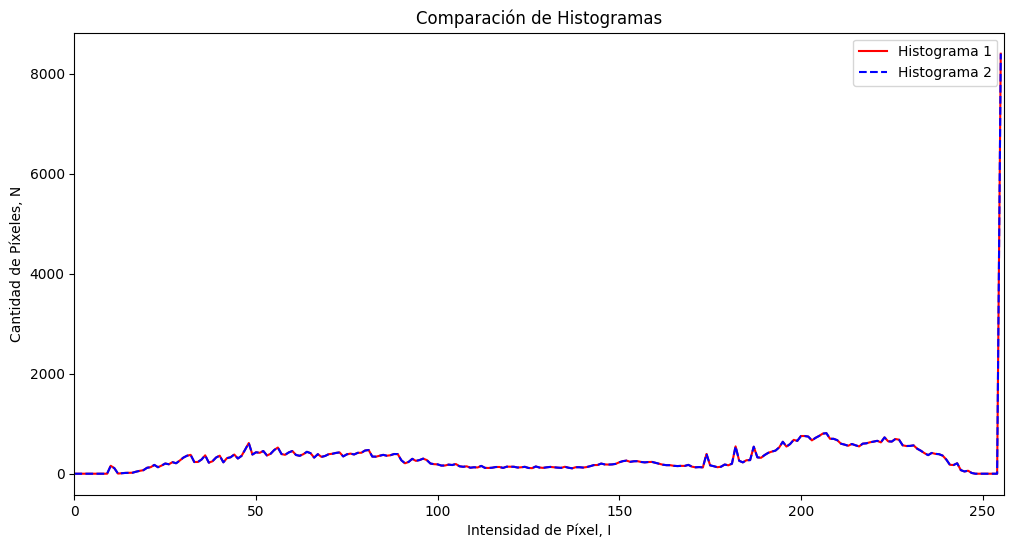

In [9]:
# Obteniendo los histogramas para cada imagen
hist1,bins1 = np.histogram(img1.ravel(),256,[0,256])
hist2,bins2 = np.histogram(img2.ravel(),256,[0,256])

# Configurando la visualización de los histogramas
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Ajustando el espacio entre los histogramas
plt.subplots_adjust(hspace=0.2, wspace=0.2)

# Mostrando los histogramas
axs[0].bar(bins1[:-1], hist1, width=bins1[1] - bins1[0], color='blue')
axs[0].set_title('Histograma 1')
axs[0].set_xlabel('Intensidad de Píxel, I')
axs[0].set_ylabel('Número de Píxeles, N')
axs[0].set_xlim([0, 256])
axs[0].set_ylim([0, max(hist1)])

axs[1].bar(bins2[:-1], hist2, width=bins2[1] - bins2[0], color='blue')
axs[1].set_title('Histograma 2')
axs[1].set_xlabel('Intensidad de Píxel, I')
axs[1].set_ylabel('Número de Píxeles, N')
axs[1].set_xlim([0, 256])
axs[1].set_ylim([0, max(hist2)])

plt.show()


# Configurando la visualización del histograma combinado
plt.figure(figsize=(12, 6))

# Mostrando los histogramas en un solo gráfico
plt.plot(bins1[:-1], hist1, label='Histograma 1', color='red', linestyle='solid')
plt.plot(bins2[:-1], hist2, label='Histograma 2', color='blue', linestyle='dashed')

# Añadiendo título y etiquetas
plt.title('Comparación de Histogramas')
plt.xlabel('Intensidad de Píxel, I')
plt.ylabel('Cantidad de Píxeles, N')
plt.xlim([0, 256])  # Establece límites para el eje X

# Añadiendo una leyenda para identificar cada histograma
plt.legend()

# Mostrar el gráfico
plt.show()


Este ejemplo, en el que los histogramas de dos imágenes diferentes son iguales, muestra que la utilización de los histogramas como *features* para modelos de clasificación/detección de imágenes no es conveniente, pues sería imposible distinguir una imagen de la otra haciendo uso de sus histogramas.

### 2.2 Segmentacion

Inicialmente, se carga la imagen a ser analizada:

Tamaño de la imagen: (628, 953, 3) pix


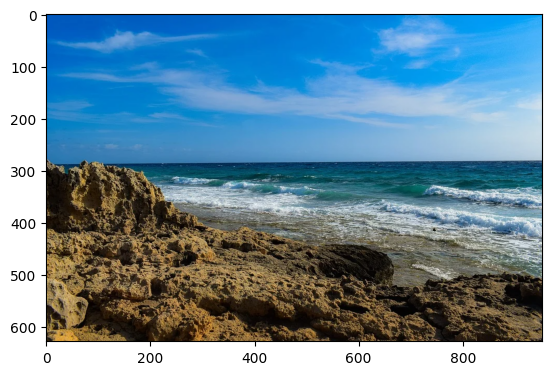

In [10]:
# Cargando la imagen RGB
img = cv.imread('segmentacion.png')

# Pasando la imagen de BRG a RGB
imgRGB = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Dimensión de la imagen
print(f'Tamaño de la imagen: {img.shape} pix')

# Mostrando la imagen
plt.figure()
plt.imshow(imgRGB)
plt.show()

Se descompone la imagen en los canales RGB y se obtienen los histogramas para cada canal:

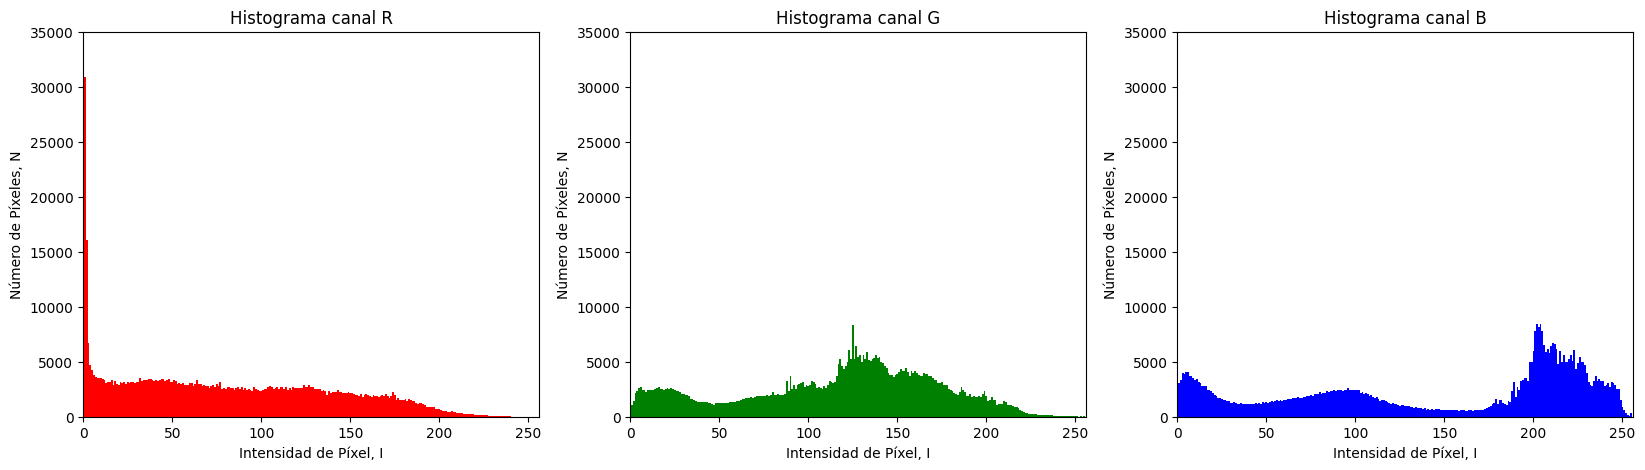

In [11]:
# Descomponiendo la imagen en los canales RGB
img_r, img_g, img_b = cv.split(imgRGB)

# Obteniendo los histogramas para cada canal
hist_r,bins_r = np.histogram(img_r.ravel(),256,[0,256])
hist_g,bins_g = np.histogram(img_g.ravel(),256,[0,256])
hist_b,bins_b = np.histogram(img_b.ravel(),256,[0,256])

# Configurando la visualización de los histogramas
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

# Ajustando el espacio entre los histogramas
plt.subplots_adjust(hspace=0.4, wspace=0.2)

# Mostrando los histogramas
axs[0].bar(bins_r[:-1], hist_r, width=bins_r[1] - bins_r[0], color='red')
axs[0].set_title('Histograma canal R')
axs[0].set_xlabel('Intensidad de Píxel, I')
axs[0].set_ylabel('Número de Píxeles, N')
axs[0].set_xlim([0, 256])
axs[0].set_ylim([0, 35000])

axs[1].bar(bins_g[:-1], hist_g, width=bins_g[1] - bins_g[0], color='green')
axs[1].set_title('Histograma canal G')
axs[1].set_xlabel('Intensidad de Píxel, I')
axs[1].set_ylabel('Número de Píxeles, N')
axs[1].set_xlim([0, 256])
axs[1].set_ylim([0, 35000])

axs[2].bar(bins_b[:-1], hist_b, width=bins_b[1] - bins_b[0], color='blue')
axs[2].set_title('Histograma canal B')
axs[2].set_xlabel('Intensidad de Píxel, I')
axs[2].set_ylabel('Número de Píxeles, N')
axs[2].set_xlim([0, 256])
axs[2].set_ylim([0, 35000])

plt.show()

Los histogramas muestran que:
- la imagen no ha sido post-procesada, pues no se observan disconitnuidades en los espectros.
- el canal rojo muestra una distribución de píxeles más uniforme en las regiones de sombras y tonos medios. Sin embargo, hay una gran cantidad de píxeles oscuros, coincidente con la región de rocas en la playa donde se aprecia una gran cantidad de zonas oscuras.
- los píxeles del canal verde se concentran principallmente en las tonalidades medias ($85<I<170$) por causa de las regiones del mar con tonalidades verdes, que son menos brillantes comparadas con el cielo.
- los píxeles del canal azul se distribuyen principalmente en los tonos brillantes ($170<I<255$) debido al cielo de la imagen, aunque se aprecia tambien una alta concentración de píxeles en la región de sombras ($0<I<85$) debido a la presencia de algunos tonos azulados en altamar.
- hay muy pocos píxeles de alta intensidad en los canales rojo y verde.

A continuación se grafican los histogramas 2D entre los canales RGB:

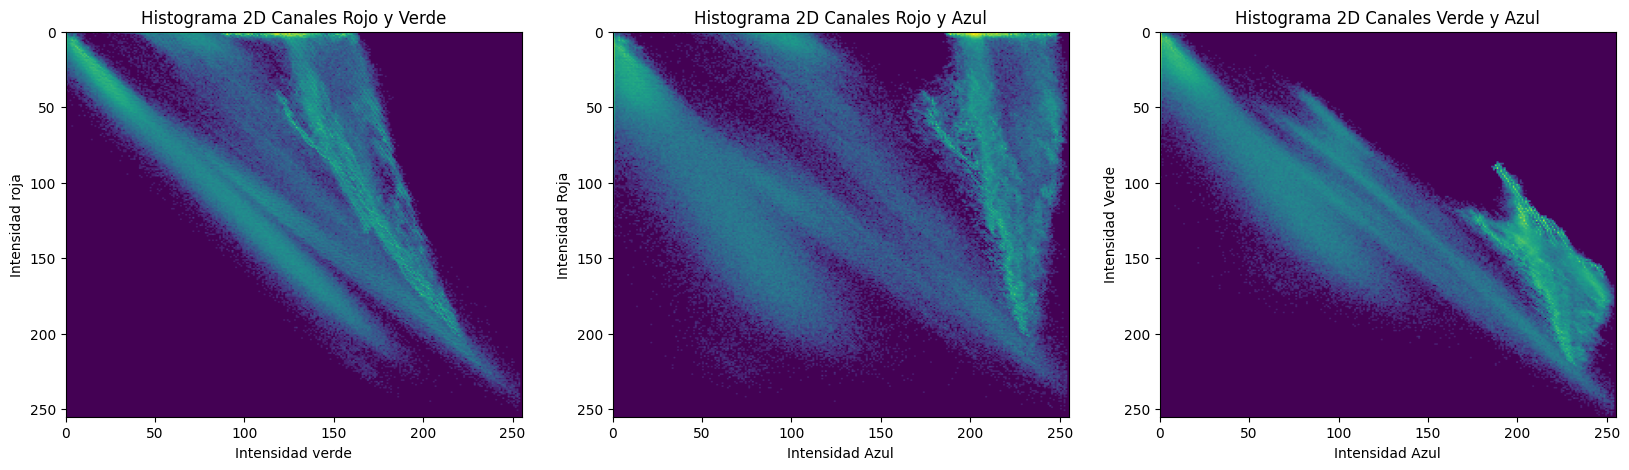

In [12]:
hist1 = cv.calcHist([imgRGB], channels=[0, 1], mask=None, histSize=[256, 256], ranges=[0, 255, 0, 255])
hist2 = cv.calcHist([imgRGB], channels=[0, 2], mask=None, histSize=[256, 256], ranges=[0, 255, 0, 255])
hist3 = cv.calcHist([imgRGB], channels=[1, 2], mask=None, histSize=[256, 256], ranges=[0, 255, 0, 255])

# Configurando la visualización de los histogramas
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

# Ajustando el espacio entre los histogramas
plt.subplots_adjust(hspace=0.4, wspace=0.2)

# Mostrando los histogramas
axs[0].imshow(np.log1p(hist1), aspect='auto', extent=[0, 255, 255, 0])
axs[0].set_title('Histograma 2D Canales Rojo y Verde')
axs[0].set_xlabel('Intensidad verde')
axs[0].set_ylabel('Intensidad roja')

axs[1].imshow(np.log1p(hist2), aspect='auto', extent=[0, 255, 255, 0])
axs[1].set_title('Histograma 2D Canales Rojo y Azul')
axs[1].set_xlabel('Intensidad Azul')
axs[1].set_ylabel('Intensidad Roja')

axs[2].imshow(np.log1p(hist3), aspect='auto', extent=[0, 255, 255, 0])
axs[2].set_title('Histograma 2D Canales Verde y Azul')
axs[2].set_xlabel('Intensidad Azul')
axs[2].set_ylabel('Intensidad Verde')


plt.show()

Los histogramas 2D muestran que existe una correlación altamente lineal entre los colores rojo y verde, debido a la mezcla de colores entre la playa y el mar, así como entre los colores verde y azul debido a la interface entre el cielo y altamar.

Estas correlaciones dificultan la segmentación de la imagen por lo que conviene transformar la imagen al espacio de color HSV:

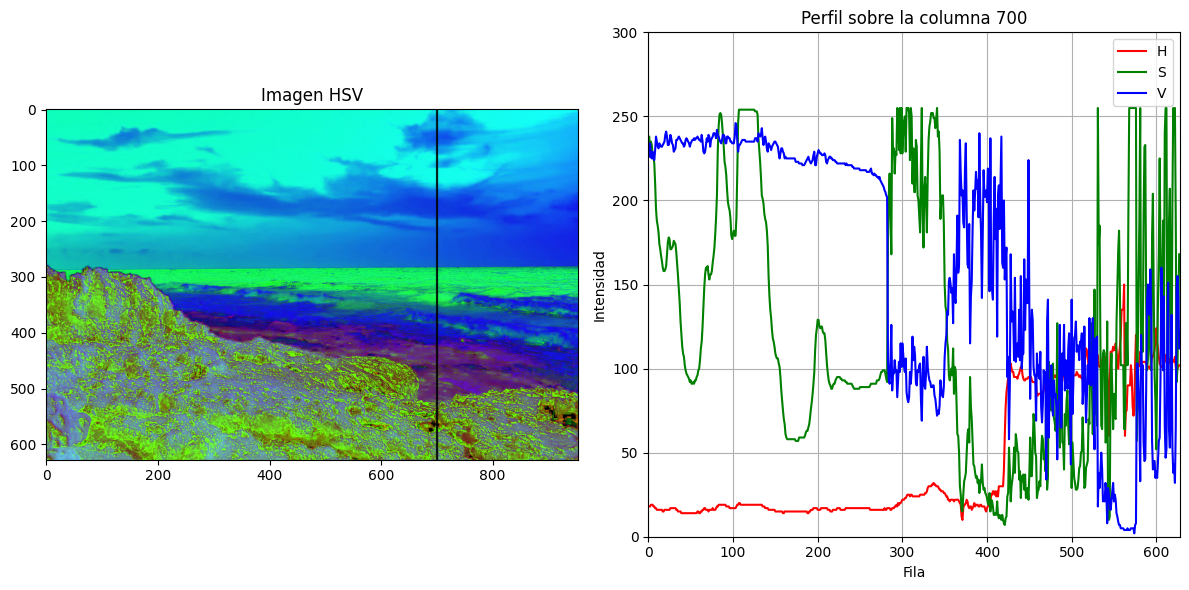

In [13]:
# Convirtiendo la imagen a HSV
imgHSV = cv.cvtColor(imgRGB, cv.COLOR_BGR2HSV)

# Estableciendo los puntos extremos de la línea de referencia
idx_col = 700
start = (idx_col, 0)
end = (idx_col, imgHSV.shape[0])

# Dibujando la línea de referencia
imgHSV_copy = imgHSV.copy()
cv.line(imgHSV_copy, start, end, (0,0,0), 2, cv.LINE_AA)

# Configurando el arreglo de subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Ajustando el espacio entre los histogramas
plt.subplots_adjust(hspace=0.4, wspace=0.2)

# Mostrando la imagen HSV
axs[0].imshow(imgHSV_copy)
axs[0].set_title('Imagen HSV')

# Mostrando el perfil de intensidad
perfil_color = imgHSV[:, idx_col]
axs[1].plot(perfil_color[:, 0], color='r', label='H')
axs[1].plot(perfil_color[:, 1], color='g', label='S')
axs[1].plot(perfil_color[:, 2], color='b', label='V')
axs[1].set_xlabel('Fila')
axs[1].set_ylabel('Intensidad')
axs[1].set_title('Perfil sobre la columna {}'.format(idx_col))
axs[1].grid(True)
axs[1].set_xlim(0, imgHSV.shape[0])
axs[1].set_ylim(0, 300)
axs[1].legend()

plt.tight_layout()
plt.show()

La imagen HSV permite observar mejor los bordes de la playa, así como la separación entre el cielo y el mar. Además, al tomar un perfil de los canales HSV como se muestra en la figura de la derecha, donde se ha graficado la intensidad de cada canal en función de los píxeles en la columna 700, se observa que los canales S y V son bastante ruidosos, mientras que el canal H tiene variaciones menos aleatorias.

Los canales S y V presentan mayores variaciones poco antes de la fila 300, ya que es ahí donde comienza el mar y por lo tanto hay más variaciones de color en el canal S, así como de sombras en el canal V. Antes de dicha fila, los valores del canal V tienden a ser altos y constantes, pues en esa región el cielo es altamente luminoso. No obstante, el canal S continua presentando variaciones pronunciadas en esta región debido a la presencia de nubes, lo que afecta el brillo de la imagen.

Por su parte el canal H, tiende a ser más constante y de bajos valores en la región del cielo, entre la fila 0 y poco antes de la fila 300. Luego tiene un pequeño aumento despues de la fila 300 debido a la presencia del mar, poco despues de la fila 400 tiene un aumento abrupto debido a la mezcla entre el mar y la playa, y finalmente presenta variaciones más aleatorias despues de la fila 500, donde ya comienza la formación rocosa.

Por lo tanto el canal H permite segmentar mejor las regiones de la imagen.

Esto se comprueba más fácilmente al mostrar los canales HSV de la imagen:

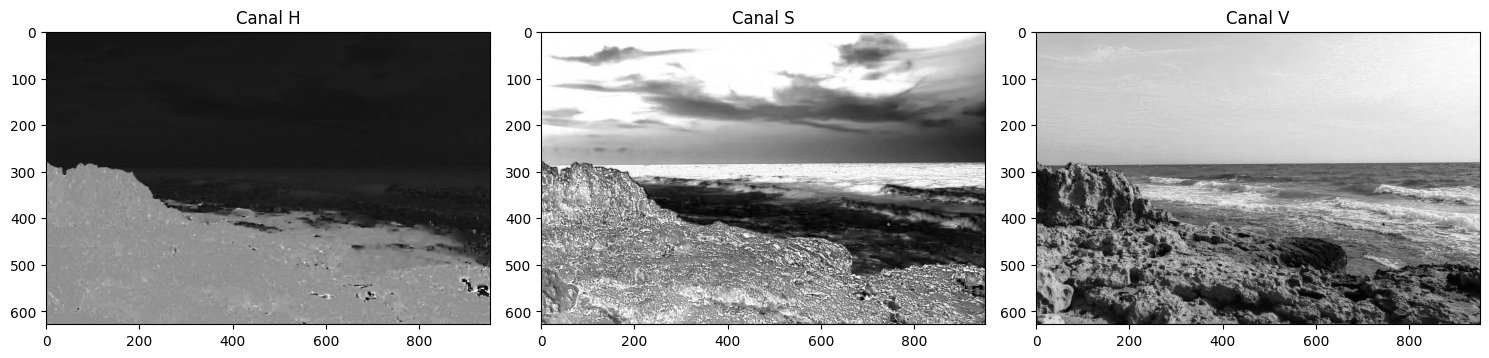

In [14]:
im_h, im_s, im_v = cv.split(imgHSV)

# Configurando el arreglo de subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 8))

# Ajustando el espacio entre los histogramas
plt.subplots_adjust(hspace=0.4, wspace=0.2)

# Mostrando la imagen HSV
axs[0].imshow(im_h, cmap='gray')
axs[0].set_title('Canal H')

axs[1].imshow(im_s, cmap='gray')
axs[1].set_title('Canal S')

axs[2].imshow(im_v, cmap='gray')
axs[2].set_title('Canal V')

plt.tight_layout()
plt.show()

En el canal H el cielo y el mar son indistinguibles, pero se observa claramente la región de la playa.

En el canal S también se pierden detalles de la imagen pero se observan mejor las diferentes regiones.

El canal V es simplemente la imagen original en escala de grises.

Con base en lo anterior, se procede a segmentar la imagen. Para ello, se toman muestras de cada región para hacer un análisis estadístico de los canales HSV como se presenta a continuación:

Valores medios de HSV
cielo: (16.676000000000002, 253.9516, 206.10240000000002, 0.0)
mar:   (24.9296, 206.6964, 108.12400000000001, 0.0)
playa: (102.10600000000001, 140.4644, 123.56960000000001, 0.0)


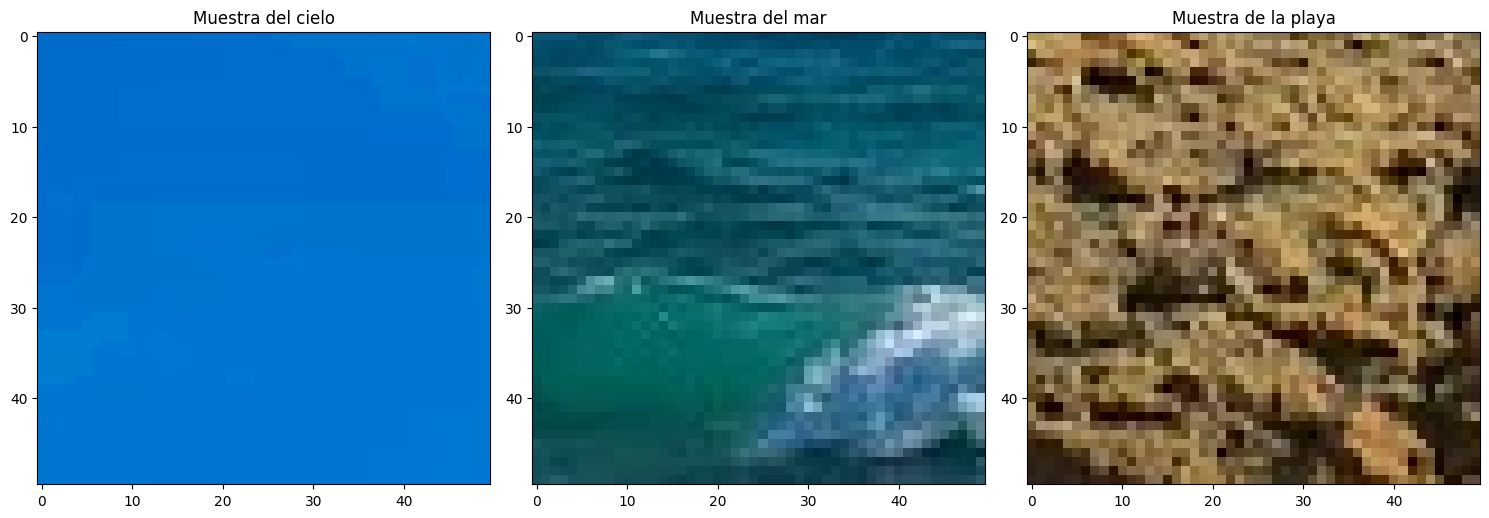

In [15]:
# Tomando muestras de cada región
sky_sample   = imgHSV[0:50,  400:450, :]
sea_sample   = imgHSV[300:350, 700:750, :]
beach_sample = imgHSV[500:550, 400:450, :]

# Haciendo una descripción estadística de cada región
sky_mean   = cv.mean(sky_sample)
sea_mean   = cv.mean(sea_sample)
beach_mean = cv.mean(beach_sample)

print("Valores medios de HSV")
print(f"cielo: {sky_mean}")
print(f"mar:   {sea_mean}")
print(f"playa: {beach_mean}")

# Preparando las muestras para visualización
sky_sample   = cv.cvtColor(sky_sample, cv.COLOR_HSV2BGR)
sea_sample   = cv.cvtColor(sea_sample, cv.COLOR_HSV2BGR)
beach_sample = cv.cvtColor(beach_sample, cv.COLOR_HSV2BGR)

# Configurando el arreglo de subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 8))

# Ajustando el espacio entre los histogramas
plt.subplots_adjust(hspace=0.4, wspace=0.2)

# Visualizando las muestras
axs[0].imshow(sky_sample)
axs[0].set_title('Muestra del cielo')

axs[1].imshow(sea_sample)
axs[1].set_title('Muestra del mar')

axs[2].imshow(beach_sample)
axs[2].set_title('Muestra de la playa')

plt.tight_layout()
plt.show()

Como se esperaba, el valor medio de H en el cielo es menor pero muy cercano al valor de la región del mar. No obstante, en la región de la playa alcanza valores máximos. Así mismo, los valores de S varían considerablemente en cada región.

Con estas informaciones se crea una máscara que permita segmentar la imagen. En este caso, la mejor opción de máscara encontrada fue la que permite definir rangos de valores de HSV en cada región:

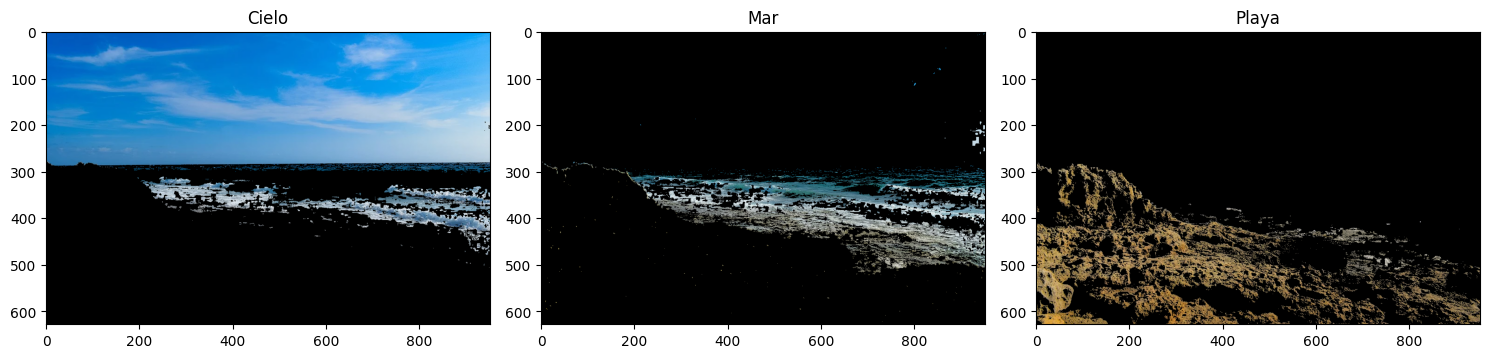

In [16]:
# Definiendo los límites inferior e superior de H
sky_l = (0,0,100)
sky_u = (20,255,255)

sea_l = (20,0,100)
sea_u = (95,220,255)

beach_l = (95,0,100)
beach_u = (255,255,255)

# Creando la máscara de segmentación
# Valores entre los límites serán 1 y fuera de ellos, 0
sky_mask = cv.inRange(imgHSV, sky_l,  sky_u)
sea_mask = cv.inRange(imgHSV, sea_l,  sea_u)
beach_mask = cv.inRange(imgHSV, beach_l,  beach_u)

# Aplicando la máscara sobre la imagen
sky   = cv.bitwise_and(imgRGB, imgRGB, mask=sky_mask)
sea   = cv.bitwise_and(imgRGB, imgRGB, mask=sea_mask)
beach = cv.bitwise_and(imgRGB, imgRGB, mask=beach_mask)

# Configurando el arreglo de subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 8))

# Ajustando el espacio entre los histogramas
plt.subplots_adjust(hspace=0.4, wspace=0.2)

# Visualizando los segmentos
axs[0].imshow(sky)
axs[0].set_title('Cielo')

axs[1].imshow(sea)
axs[1].set_title('Mar')

axs[2].imshow(beach)
axs[2].set_title('Playa')

plt.tight_layout()
plt.show()



Este tipo de máscara no permite segmentar perfectamente cada región de la imagen, sin embargo, ajustando los rangos no solo de H, sino también de S como se indica en el código, es posible obtener buenas aproximaciones.

Debido a la superposición de colores entre el cielo y el mar, no es posible quitar partes del mar en la segmentación del cielo. No obstante, al aumentar los valores de H, es posible segmentar casi toda la región del mar, aunque con problemas en la zona cerca a la interface con el cielo.

Por su parte, la región de la playa, al tener los máximos valores de H, es fácilmente segmentable.